![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)
# <font color='Blue'>Ciência dos Dados na Prática</font>

# <font color='purple'> Prevendo a Qualidade do Vinho para E-commerce</font>

![](https://giffiles.alphacoders.com/137/13735.gif)

# Celebrar momentos Felizes

![](http://mtv.mtvnimages.com/uri/mgid:file:http:shared:mtv.com/news/wp-content/uploads/2015/07/tumblr_inline_mvsvzrJJhj1sqzrjo-1436557026.gif)

# Esquecer os Probrema

![](http://gif-free.com/uploads/posts/2017-11/1510128018_add-more-wine.gif)

# Brindar a vida seus amores sua Família

![](https://c.tenor.com/3EjjHsI8nx4AAAAC/wine-fireplace.gif)

![](https://res.cloudinary.com/evino/image/upload/w_330,h_110/v1/web/assets/logo/logo-red.svg)

https://www.evino.com.br/

![](https://res.cloudinary.com/evino/image/upload/f_auto,w_1600,dpr_1.0,t_banner/v1631716927/campaigns/2021/09-setembro/2021_09_16_KitCliente/hero_1_v2_multiple_desktop.png)

![](https://cienciadosdados.com/images/thumbs/evino.png)

![](https://cienciadosdados.com/images/thumbs/evino2.png)

![](https://cienciadosdados.com/images/thumbs/evino3.png)

# 1. Problema de Negócio

Precisamos Criar uma Máquina Preditiva que faça previsão da Qualidade do Vinho

 - Otimização da seleção de Produtores
 - Precificação Quantitativa com base nesse indicador de Qualidade
 - Inteligência de Mercado

![]()

In [ ]:
# Importação de Bibliotecas 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [ ]:
# Conectando-se com os Dados - Importação do arquivo .csv
df = pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

# 2° Análise Exploratória

In [ ]:
# Análise da Shape do Dataset
df.info()

In [ ]:
# Análise Estatística dos Dados
df.describe()

In [ ]:
# Quantidade de domínios no Target
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#Instalação do Pacote
https://www.youtube.com/watch?v=D0drTFRdsJg
!pip install dataprep

DataPrep Report
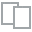
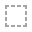
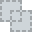
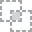
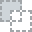
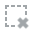
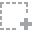
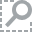
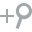
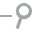
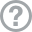
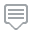
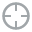
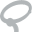
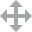
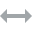
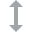
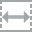
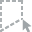
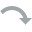
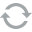
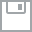
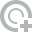
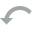
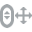
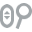
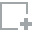
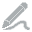
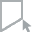
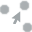
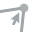
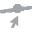

In [10]:
# Relatório Automatizado
from dataprep.eda import create_report
create_report(df)


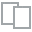
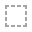
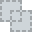
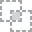
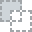
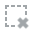
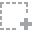
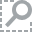
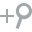
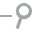
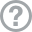
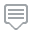
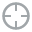
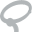
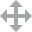
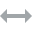
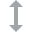
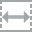
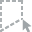
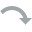
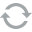
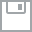
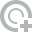
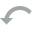
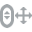
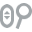
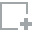
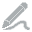
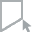
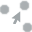
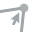
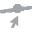

In [11]:
# Relatório de Correlação
from dataprep.eda import plot_correlation
plot_correlation(df)


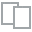
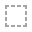
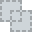
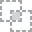
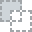
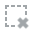
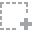
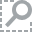
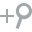
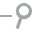
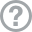
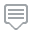
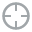
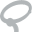
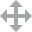
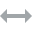
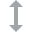
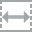
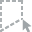
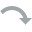
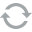
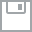
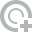
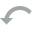
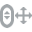
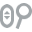
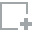
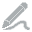
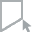
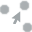
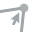
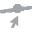

In [12]:
# Relatório de Distribuição das Variáveis
from dataprep.eda import plot
plot(df)

In [13]:
# Não existem variáveis ​​categóricas. Cada variável é um número. Problema de regressão*. 
# Temos de prever a qualidade do vinho. 
# Vamos encontrar correlação de cada recurso com nossa variável-alvo - quality

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


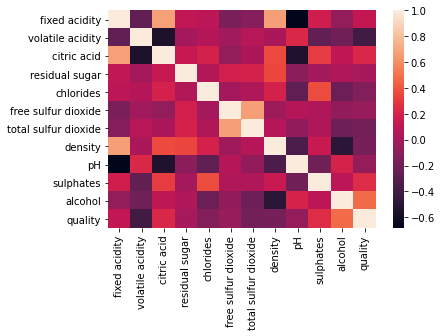

In [14]:
# Matplotlib
sns.heatmap(df.corr())
plt.show()

# 3° Pré-Processamento dos Dados

In [15]:
# Separando variáveis explicativas e o Target
X = df.drop(labels=['quality'], axis=1)
y = df['quality'].values

# Amostragem - Separando os dados para Treinar e testar
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4° Construção da Máquina Preditiva

## 1. Base Line

### **Regressão Linear**

In [32]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[5.23381934 5.04148093 5.8674267  ... 4.97834394 6.63788787 6.76273841]
[5.34360227 5.06294956 5.63333204 5.45176186 5.74570371 5.27637941
 5.03060591 5.14548634 5.74793413 5.71379639 6.14292388 5.25602325
 5.55746352 5.25516748 5.44918167 6.50428691 5.16155023 5.58177831
 6.56354719 5.31109369 5.42314936 5.19226562 5.99245498 6.40578182
 5.36515018 5.42441564 6.35376721 5.37618609 5.16180078 6.16014475
 5.25888679 5.538378   5.7525049  5.3863994  5.45667328 5.02911082
 6.1905284  5.71266674 5.63463533 6.20179362 5.50279355 5.24191583
 6.16908347 5.15779342 5.85212953 5.8169982  6.415135   5.57902528
 5.16752006 5.57681837 5.12302477 5.08832659 5.6067245  6.37829292
 4.96528844 4.97488594 6.03283966 5.4259819  5.86156997 5.26390122
 5.60706205 5.97031204 5.28379018 5.32034058 6.50607979 5.41422594
 6.36327206 5.25281218 6.43657812 5.30042793 6.45787251 4.75051838
 5.7864449  5.85992669 6.20765657 5.28686299 6.81315764 5.89419286
 6.11784951 6.46159339 5.31818885 6.4649474  5.44746923 5

## 2. Entrando nos Boostings - Máquinas de auto aprimoramento 

###          **GBM**

In [23]:
# Treinando o GBM
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Fazendo Previsões com a Máquina
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

### **XGBoost**

In [24]:
# Treinando o GBM
from xgboost import XGBClassifier
regressor = XGBClassifier(n_estimators=2000 , max_depth=4, learning_rate=0.001)
regressor.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Fazendo Previsões com a Máquina
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

### **LightGBM**

In [28]:
# Treinando o GBM
import lightgbm as lgb
regressor = lgb.LGBMRegressor(learning_rate=0.001)
regressor.fit(X_train,y_train)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.001, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Fazendo Previsões com a Máquina
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

# 5° Avaliação da Máquina

#### Comparação de Treino e teste

In [34]:
# Calculando a Métrica RMSE
from sklearn.metrics import mean_squared_error

# Base de Treino 
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print('RMSE de Treino :',train_rmse)

# Base de Teste
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print('RMSE de Teste :',test_rmse)


RMSE de Treino : 0.6537726276403218
RMSE de Teste : 0.6231386191586046


In [35]:
# Arredondando os Valores Previstos 
# Obs: Aqui já poderia filtrar os vinhos de maior qualidade (7,8)
from sklearn.metrics import mean_squared_error
predicted_data = np.round_(test_pred)
print(predicted_data) 
print('RMSE - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))


[5. 5. 6. 5. 6. 5. 5. 5. 6. 6. 6. 5. 6. 5. 5. 7. 5. 6. 7. 5. 5. 5. 6. 6.
 5. 5. 6. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 5. 7. 5. 6. 5. 6. 5. 6. 5.
 6. 6. 6. 5. 7. 6. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 6.
 5. 6. 5. 6. 5. 5. 6. 6. 5. 6. 6. 5. 6. 5. 7. 5. 6. 5. 6. 6. 6. 5. 5. 6.
 6. 5. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 5. 5. 6. 6. 6. 6. 6.
 6. 5. 6. 5. 6. 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5. 5.
 5. 5. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 7. 5. 5. 6.
 6. 7. 6. 5. 5. 5. 6. 6. 5. 6. 5. 5. 7. 6. 5. 6. 6. 6. 6. 5. 6. 7. 6. 6.
 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 5. 5.
 6. 5. 6. 6. 5. 6. 6. 5. 7. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 7. 6. 6. 5. 7.
 6. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 6. 6. 5. 7. 5. 5. 6. 5. 6. 5. 6.
 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 6. 7. 5. 5. 6. 5. 5. 5. 6. 6. 6. 7. 6. 6.
 6. 6. 5. 6. 5. 5. 6. 5. 6. 6. 6. 5. 5. 6. 6. 6. 5.

In [36]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_ ) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

    Coeffecient
0      0.021860
1     -1.008695
2     -0.133904
3      0.008859
4     -1.755578
5      0.005009
6     -0.003654
7    -16.223648
8     -0.343940
9      0.819819
10     0.286228


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **Resumão**
![](https://onpassive.com/blog/wp-content/uploads/2021/01/Machine-Learning-in-E-Learning.gif)

* Nesta aula, aprendemos a **Criar Máquina Preditiva** que prevê a qualidade de Vinhos. 
* Mais 1 Case com algoritmos da Família Ensemble **GBM, XGBoost e LightGBM**
* Análise Exploratória Automatizada - **Dataprep**
* Colocou no bolso mais um exemplo de case real de soluções de Ciência de Dados para E-commerce em geral




#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="320" height="180" src="https://www.youtube.com/embed/WH6_pWe2_r0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')